# NeuraTech E-Ticaret Platformu Veri Analizi ( Eğitmen Çözümleri )

Bu Jupyter Notebook, NeuraTech E-Ticaret platformunda farklı ürün kategorilerindeki satışlar, müşteri değerlendirmeleri ve kargo süreleri verilerini analiz etmek için hazırlanmıştır. Aşağıda, istenen analizler ve görselleştirmeler adım adım gerçekleştirilmiştir:

1. **Kategori bazında satış analizi** (Bar Plot)
2. **Değerlendirme puanı dağılımı** (Histogram ve Yoğunluk Grafiği - histplot)
3. **Satışlar ve değerlendirme ilişkisi** (Saçılım Grafiği - scatter plot)
4. **Kargo süresi ve satış ilişkisi** (Regresyon Grafiği - regplot)
5. **Kategorilere göre değerlendirme puanı karşılaştırması** (Kutu Grafiği - boxplot)
6. **Satışlar ve değerlendirme puanlarının zaman içindeki değişimi** (Çizgi Grafikleri - line plot)

Bu analizler, Python’da `pandas`, `matplotlib` ve `seaborn` kütüphaneleri kullanılarak gerçekleştirilmiştir. Veri seti rastgele oluşturulmuş olup, tüm kodlar ve görselleştirmeler aşağıda markdown formatında düzenlenmiştir.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

# Genişletilmiş örnek veri oluşturalım
np.random.seed(42)

veri = {
    'Kategori': np.random.choice(['Elektronik', 'Giyim', 'Ev & Yaşam', 'Kitap'], 1000),
    'Satışlar': np.random.randint(50, 500, 1000),
    'Değerlendirme': np.random.uniform(1, 5, 1000),
    'Kargo Süresi': np.random.randint(1, 10, 1000),  # Kargo süresi (gün)
    'Tarih': [datetime.date(2023, 1, 1) + datetime.timedelta(days=i) for i in range(1000)] # Satış tarihleri
}

df = pd.DataFrame(veri)

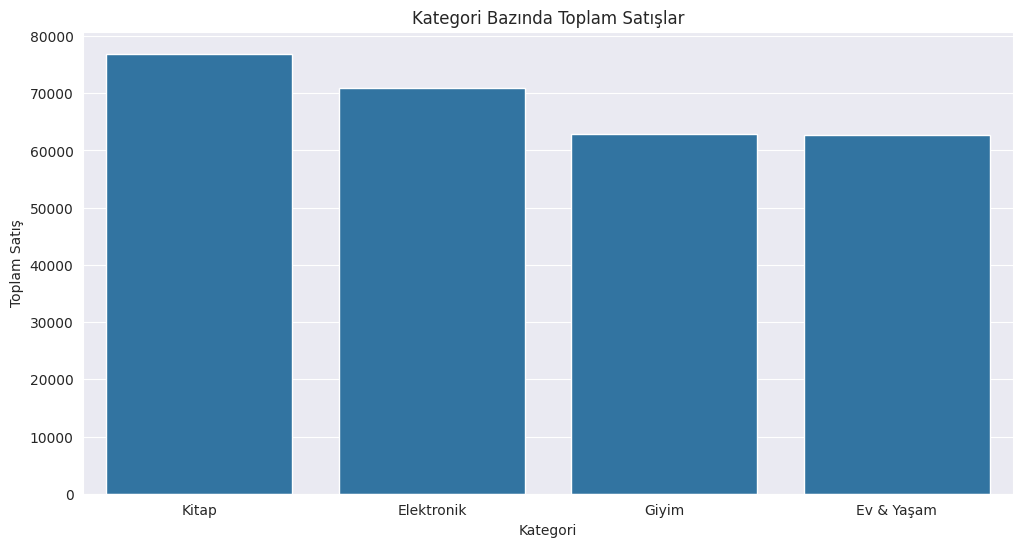

In [2]:
# 1. Kategori Bazında Satış Analizi (bar plot)
kategori_satış = df.groupby('Kategori')['Satışlar'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=kategori_satış.index, y=kategori_satış.values)
plt.title('Kategori Bazında Toplam Satışlar')
plt.xlabel('Kategori')
plt.ylabel('Toplam Satış')
plt.show()

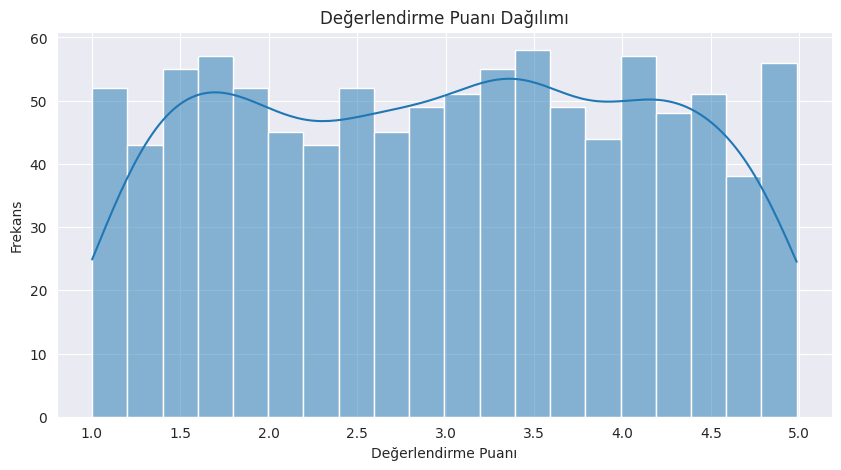

In [3]:
# 2. Değerlendirme Puanı Dağılımı (histogram ve yoğunluk grafiği)
plt.figure(figsize=(10, 5))
sns.histplot(df['Değerlendirme'], bins=20, kde=True)
plt.title('Değerlendirme Puanı Dağılımı')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Frekans')
plt.show()

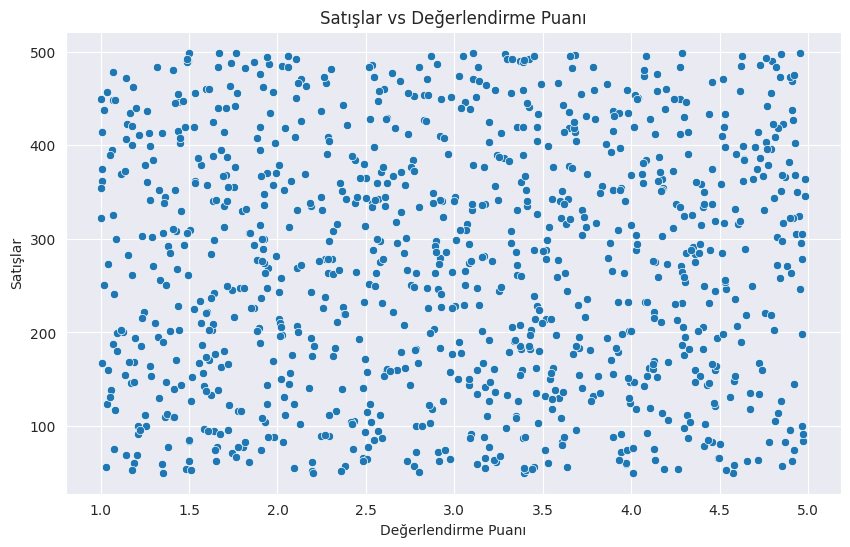

In [4]:
# 3. Satışlar ve Değerlendirme İlişkisi (saçılım grafiği)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Değerlendirme', y='Satışlar', data=df)
plt.title('Satışlar vs Değerlendirme Puanı')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Satışlar')
plt.show()

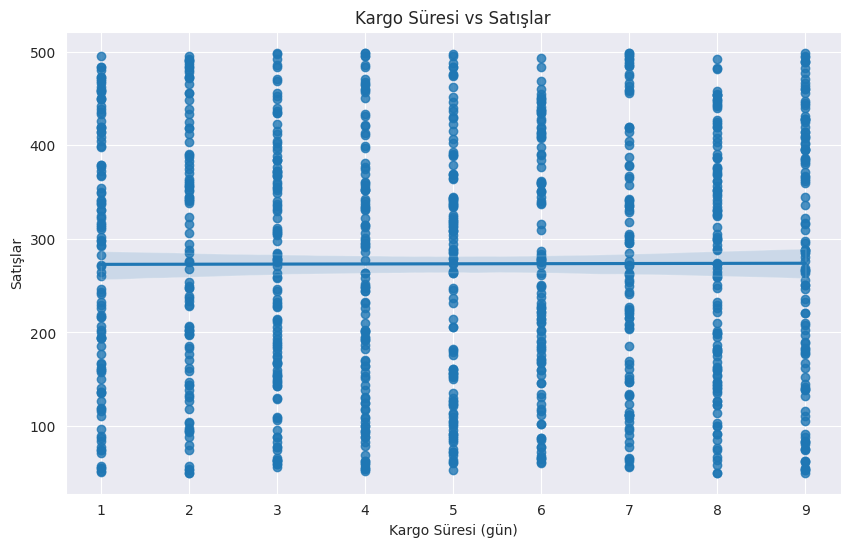

In [5]:
# 4. Kargo Süresi ve Satış İlişkisi (regresyon grafiği)
plt.figure(figsize=(10, 6))
sns.regplot(x='Kargo Süresi', y='Satışlar', data=df)
plt.title('Kargo Süresi vs Satışlar')
plt.xlabel('Kargo Süresi (gün)')
plt.ylabel('Satışlar')
plt.show()

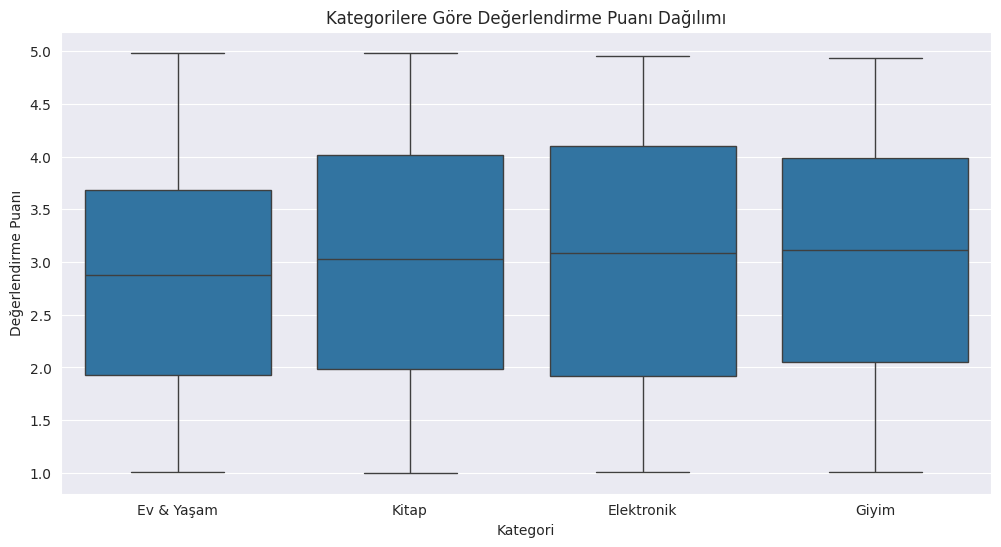

In [6]:
# 5. Kategorilere Göre Değerlendirme Puanı Karşılaştırması (kutu grafiği)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Kategori', y='Değerlendirme', data=df)
plt.title('Kategorilere Göre Değerlendirme Puanı Dağılımı')
plt.xlabel('Kategori')
plt.ylabel('Değerlendirme Puanı')
plt.show()

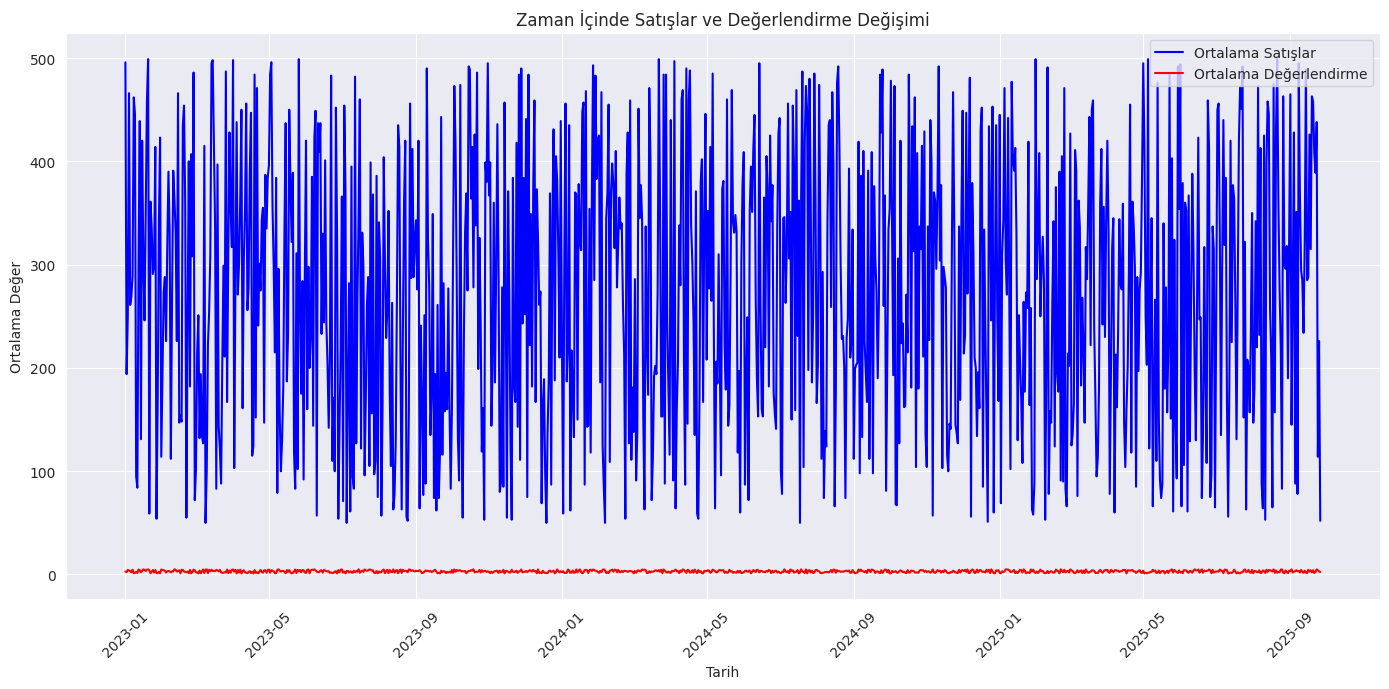

In [7]:
# 6. Satışlar ve Değerlendirme Puanlarının Zaman İçindeki Değişimi (çizgi grafikleri)
zaman_serisi = df.groupby('Tarih').agg({'Satışlar': 'mean', 'Değerlendirme': 'mean'})

plt.figure(figsize=(14, 7))
plt.plot(zaman_serisi.index, zaman_serisi['Satışlar'], label='Ortalama Satışlar', color='blue')
plt.plot(zaman_serisi.index, zaman_serisi['Değerlendirme'], label='Ortalama Değerlendirme', color='red')
plt.title('Zaman İçinde Satışlar ve Değerlendirme Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Değer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()